In [1]:
import os
from pathlib import Path

In [2]:
import tensorflow as tf
import cv2 as cv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
from utils.plot_history import plot_history

In [4]:
data_dir = Path(os.getcwd()) / ".dataset"
train_direcory = data_dir / "Training"
test_direcory = data_dir / "Testing"

In [5]:
_seed = 9118487
validation_split = .2

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_direcory,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    validation_split=validation_split,
    subset='training',
    seed=_seed
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_direcory,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    validation_split=validation_split,
    subset='validation',
    seed=_seed
)

test_dateset = tf.keras.utils.image_dataset_from_directory(
    test_direcory,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    seed=_seed
)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.
Found 394 files belonging to 4 classes.


In [6]:
for images, labels in train_dataset.take(1):
    img = images[0].numpy().astype("uint8")
    # label = labels[0].numpy()
    label = labels[0]
    input_data_shape = np.array(img).shape

label: 3
shape: (256, 256, 3)
image:


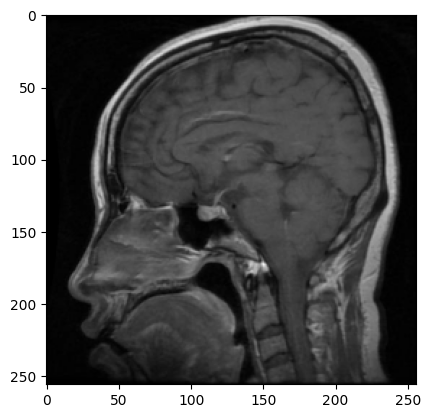

In [7]:
print(f"label: {label}")
print(f"shape: {np.array(img).shape}")
print("image:")
plt.imshow(img)
plt.show()

# Model MLP

In [8]:
mlp_model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=input_data_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(len(train_dataset.class_names), activation='softmax')
    ]
)

mlp_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

c:\dev\pjatk_wum_project\.venv\neural_net\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
mlp_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

mlp_history = mlp_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[mlp_early_stopping]
)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.3374 - loss: 2828.7734 - val_accuracy: 0.2683 - val_loss: 1.4359
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.2950 - loss: 1.4590 - val_accuracy: 0.3258 - val_loss: 1.3674
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.2667 - loss: 1.3710 - val_accuracy: 0.3240 - val_loss: 1.3600
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 192ms/step - accuracy: 0.2700 - loss: 1.3630 - val_accuracy: 0.3240 - val_loss: 1.3544
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.2719 - loss: 1.3508 - val_accuracy: 0.3240 - val_loss: 1.3256
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 185ms/step - accuracy: 0.2751 - loss: 1.3944 - val_accuracy: 0.3240 - val_loss: 1.3507
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.2788 - loss: 1.3572 - val_accuracy: 0.2648 - val_loss: 1.3490


In [10]:
print(tf.config.list_physical_devices('GPU'))

[]
